In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
file_Name = "Northern Branch Phase II Debris Removal Ops.xlsx"

In [3]:
df = pd.read_excel(file_Name)
df.shape

(2092, 92)

In [4]:
df

,APN,County,Structural Status,Haz Tree Only,# of Trees,Haz Trees Assessment,Haz Trees,Hazard Tree Status,Street #,Street Name,...,County Notified Haz Tree Only,Approved for Special Inclusion,Sync Status,Tree Eligibility,Tree Felling Complete,Tree Removal Complete,Number of Trees Felled,Trees Final Site Walk,In Tree Tracker?,duplicate
0,810-535-33189-000,LionKing,ROE Received,NaN,NaN,NaT,NaN,NaN,1000000006,1000001 seame Street,...,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN
1,739-195-37236-000,Beetle Juice,ROE Received,NaN,NaN,NaT,NaN,NaN,1000000007,1000002 seame Street,...,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN
2,264-009-70438-000,Zelda,ROE Received,NaN,NaN,NaT,NaN,NaN,1000000008,1000003 seame Street,...,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN
3,421-184-36498-000,Mario Land,ROE Received,NaN,NaN,NaT,NaN,NaN,1000000009,1000001 seame Street,...,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN
4,173-267-38330-000,LionKing,ROE Received,1.0,NaN,NaT,NaN,NaN,1000000010,1000002 seame Street,...,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2087,162-826-34949-000,Mario Land,ROE Received,1.0,NaN,NaT,NaN,NaN,1000002093,1000003 seame Street,...,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN
2088,800-326-4767-000,LionKing,Pending Soil Sample Results,NaN,13.0,2021-01-20,Yes,Hazard Trees Assessed,1000002094,1000001 seame Street,...,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN
2089,128-775-68678-000,Beetle Juice,ROE Received,1.0,79.0,2021-03-08,Yes,Hazard Trees Assessed,1000002095,1000001 seame Street,...,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN
2090,683-274-76996-000,Zelda,Debris Removal in Progress,NaN,418.0,2021-04-20,Yes,Hazard Trees Assessed,1000002096,1000002 seame Street,...,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN


In [5]:
df.loc[:, ['Number of Vehicles', 'Number of Vehicles Removed']] = df.loc[:, ['Number of Vehicles', 'Number of Vehicles Removed']].fillna(0)

In [6]:
df['Number of Vehicles'].dtypes

dtype('float64')

In [7]:
df['Number of Vehicles Removed'].dtypes

dtype('O')

covert Number of vehicles object to a int or float category

In [8]:
df['Number of Vehicles Removed'] = pd.to_numeric(df['Number of Vehicles Removed'], errors='coerce')

In [9]:
df['Number of Vehicles Removed'].dtype

dtype('float64')

Create a new column with vehicles left over

In [10]:
df.loc[:, 'Vehicle Left'] =  df.loc[:, 'Number of Vehicles'] - df.loc[:, 'Number of Vehicles Removed']

In [11]:
dfVecfilt = df[['Number of Vehicles','Number of Vehicles Removed', 'County','Vehicle Left']].groupby('County').sum()
dfVecfilt

,Number of Vehicles,Number of Vehicles Removed,Vehicle Left
County,,,
Beetle Juice,1475.0,730.0,745.0
LionKing,1587.0,897.0,688.0
Mario Land,1279.0,638.0,633.0
Zelda,1595.0,908.0,685.0


<AxesSubplot:xlabel='County'>

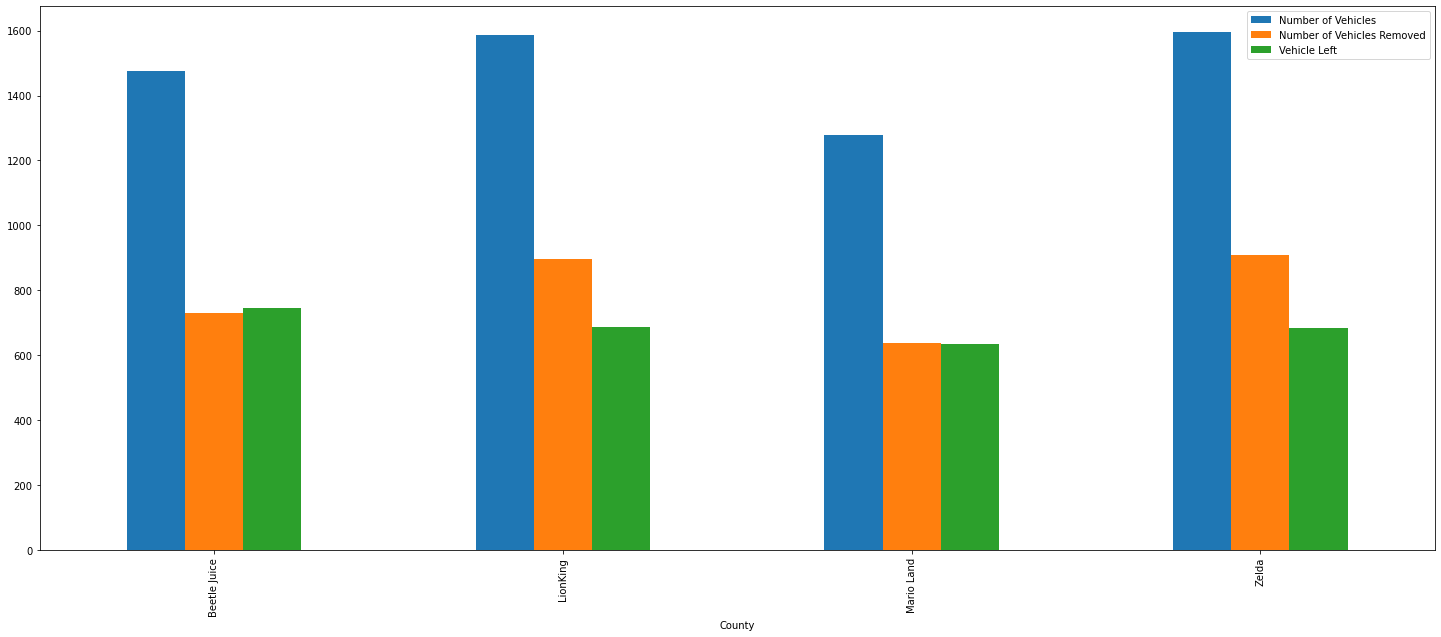

In [12]:
dfVecfilt.plot(kind='bar', figsize=(25,10))

# Make graph above with total for each bar placed on top

In [13]:
df_value2 = dfVecfilt.loc[:, 'Number of Vehicles']
df_value3 = dfVecfilt.loc[:, 'Number of Vehicles Removed']
df_value4 = dfVecfilt.loc[:, 'Vehicle Left']

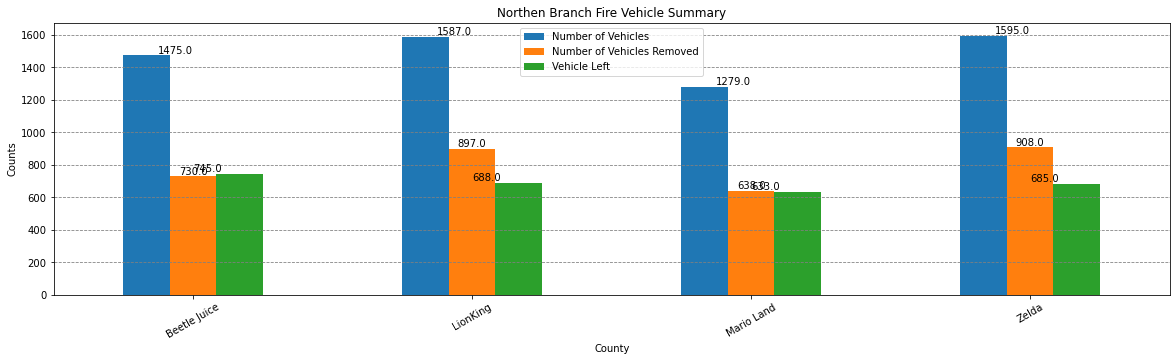

In [16]:
dfVecfilt.plot(kind='bar',  figsize=(20,5))

for i in range(len(df_index)):
    plt.text(i, df_value2[i], df_value2[i], ha='right', va='bottom')
    plt.text(i, df_value3[i], df_value3[i], ha='center', va='bottom')
    plt.text(i, df_value4[i], df_value4[i], ha='left', va='bottom')
plt.xticks(rotation=30)
plt.title("Northen Branch Fire Vehicle Summary")
plt.ylabel("Counts")
plt.grid(color='gray', linestyle='--', axis='y')
# plt.tight_layout()
plt.show()